In [17]:
import pandas as pd
from dtaidistance import dtw
from dtaidistance import dtw_visualisation as dtwvis
import numpy as np
import itertools
import os
import seaborn as sns
import spacy
from bs4 import BeautifulSoup
import requests
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [7]:
def get_fileNames(category: str):
    file_names = []
    for files in os.listdir("../Data/" + category):
        if files.endswith(".csv"):
            files = files[0:len(files)-4]
            file_names.append(files)
    return file_names

In [8]:
def make_data(category, article):
    df = pd.read_csv(f"../Data/{category}/{article}.csv")

    df.index = df["timestamp"]
    df.drop(["project", "article", 'granularity', 'access', 'agent', 'timestamp'], axis=1, inplace=True)
    df.index = pd.to_datetime(df.index)

    scaler = MinMaxScaler(feature_range=(1, 5))
    data = np.array(df["views"])
    data = data.reshape(len(data), 1)
    scaler = scaler.fit(data)
    data = scaler.transform(data)
    df["views"] = data
    df.dropna(inplace=True)

    return df

# Dynamic Time Warping

In [18]:
files = get_fileNames("Music")
df = pd.DataFrame({"Article1": [], "Article2": [], "Distance": []})
matches = []
for count, i in enumerate(itertools.combinations(files, 2)):
    s1 = np.array(make_data("Music", i[0])["views"])
    s2 = np.array(make_data("Music", i[1])["views"])
    df.loc[count] = [i[0], i[1], dtw.distance(s1, s2)]
    if count % 10 == 0:
        print(count)
df

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990
1000
1010
1020
1030
1040
1050
1060
1070
1080
1090
1100
1110
1120
1130
1140
1150
1160
1170
1180
1190
1200
1210
1220
1230
1240
1250
1260
1270
1280
1290
1300
1310
1320
1330
1340
1350
1360
1370
1380
1390
1400
1410
1420
1430
1440
1450
1460
1470
1480
1490
1500
1510
1520
1530
1540
1550
1560
1570
1580
1590
1600
1610
1620
1630
1640
1650
1660
1670
1680
1690
1700
1710
1720
1730
1740
1750
1760
1770
1780
1790
1800
1810
1820
1830
1840
1850
1860
1870
1880
1890


,Music1,Music2,Distance
0,(Everything I Do) I Do It for You,7 Rings,3.146449
1,(Everything I Do) I Do It for You,A Whiter Shade of Pale,1.434635
2,(Everything I Do) I Do It for You,All About That Bass,2.028705
3,(Everything I Do) I Do It for You,All I Want for Christmas Is You,5.011793
4,(Everything I Do) I Do It for You,Bad Romance,1.294955
...,...,...,...
1886,We Are the World,"Yes Sir, I Can Boogie",3.150281
1887,We Are the World,You're the One That I Want,2.247534
1888,Y.M.C.A.,"Yes Sir, I Can Boogie",5.092801
1889,Y.M.C.A.,You're the One That I Want,4.701206


In [19]:
df.to_csv("dtw_music.csv")

In [4]:
def process_dtw_data(df):
    df_clean = pd.DataFrame(columns=get_fileNames("Music"))

    for count, file in enumerate(get_fileNames("Music")):
        distances = []
        for column in df_clean:
            if column == file:
                distances.append(1)
                continue
            distances.append(df.loc[((df["Music1"] == file) & (df["Music2"] == column)) | ((df["Music2"] == file) & (df["Music1"] == column))]["Distance"].item())
        df_clean.loc[count] = distances
    return df_clean

In [10]:
df = pd.read_csv("dtw_music.csv")
df = process_dtw_data(df)
df.to_csv("dtw_music_clean.csv")

In [23]:
df = pd.read_csv("dtw_music_clean.csv")
df = df.drop(["Unnamed: 0"], axis=1)
df.index = get_fileNames("Music")
df

,(Everything I Do) I Do It for You,7 Rings,A Whiter Shade of Pale,All About That Bass,All I Want for Christmas Is You,Bad Romance,Bei Mir Bist Du Schön,Blurred Lines,Call Me Maybe,Chirpy Chirpy Cheep Cheep,...,Thinking Out Loud,Thrift Shop,Un-Break My Heart,Uptown Funk,Wabash Cannonball,Waka Waka (This Time for Africa),We Are the World,Y.M.C.A.,"Yes Sir, I Can Boogie",You're the One That I Want
(Everything I Do) I Do It for You,1.000000,3.146449,1.434635,2.028705,5.011793,1.294955,1.955903,2.516264,4.372027,6.364913,...,1.678821,1.496106,2.145397,2.542312,4.562791,1.536055,1.792429,5.168808,2.597846,1.634613
7 Rings,3.146449,1.000000,3.074621,1.742380,6.144868,1.901840,3.213016,2.978975,4.193471,5.818439,...,1.892734,2.483267,2.623170,2.132873,3.294155,1.521329,4.270013,5.458487,2.748706,1.879249
A Whiter Shade of Pale,1.434635,3.074621,1.000000,1.586758,5.336445,0.981748,1.622377,2.181028,4.000060,6.045076,...,1.266202,1.035588,2.390715,2.318132,4.626049,1.335142,1.674999,5.012893,2.410585,1.581396
All About That Bass,2.028705,1.742380,1.586758,1.000000,6.074249,1.458825,1.861453,2.520305,5.351609,7.101718,...,1.659539,1.174490,2.833474,3.878160,5.053604,0.698479,1.183927,5.632629,2.709833,2.074811
All I Want for Christmas Is You,5.011793,6.144868,5.336445,6.074249,1.000000,5.732167,5.253442,4.422000,5.043722,5.900536,...,6.223447,5.001864,4.939585,6.494546,5.087664,6.111225,6.723941,5.605580,4.726573,4.516084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Waka Waka (This Time for Africa),1.536055,1.521329,1.335142,0.698479,6.111225,0.876279,1.793908,2.421927,5.391416,6.830515,...,1.074501,0.965090,2.832542,3.729823,4.921135,1.000000,1.238080,5.590681,2.678951,1.926564
We Are the World,1.792429,4.270013,1.674999,1.183927,6.723941,1.394531,2.058612,2.987813,6.173997,7.902301,...,1.950861,1.365796,3.073756,3.388012,6.373417,1.238080,1.000000,6.145469,3.150281,2.247534
Y.M.C.A.,5.168808,5.458487,5.012893,5.632629,5.605580,5.265398,5.038920,4.752526,3.983044,5.007982,...,5.178825,5.188764,4.582664,4.714225,4.433457,5.590681,6.145469,1.000000,5.092801,4.701206
"Yes Sir, I Can Boogie",2.597846,2.748706,2.410585,2.709833,4.726573,2.493415,2.405974,2.375988,4.601523,5.919452,...,2.653357,2.520683,2.062919,4.189874,4.137277,2.678951,3.150281,5.092801,1.000000,2.445791


<AxesSubplot: >

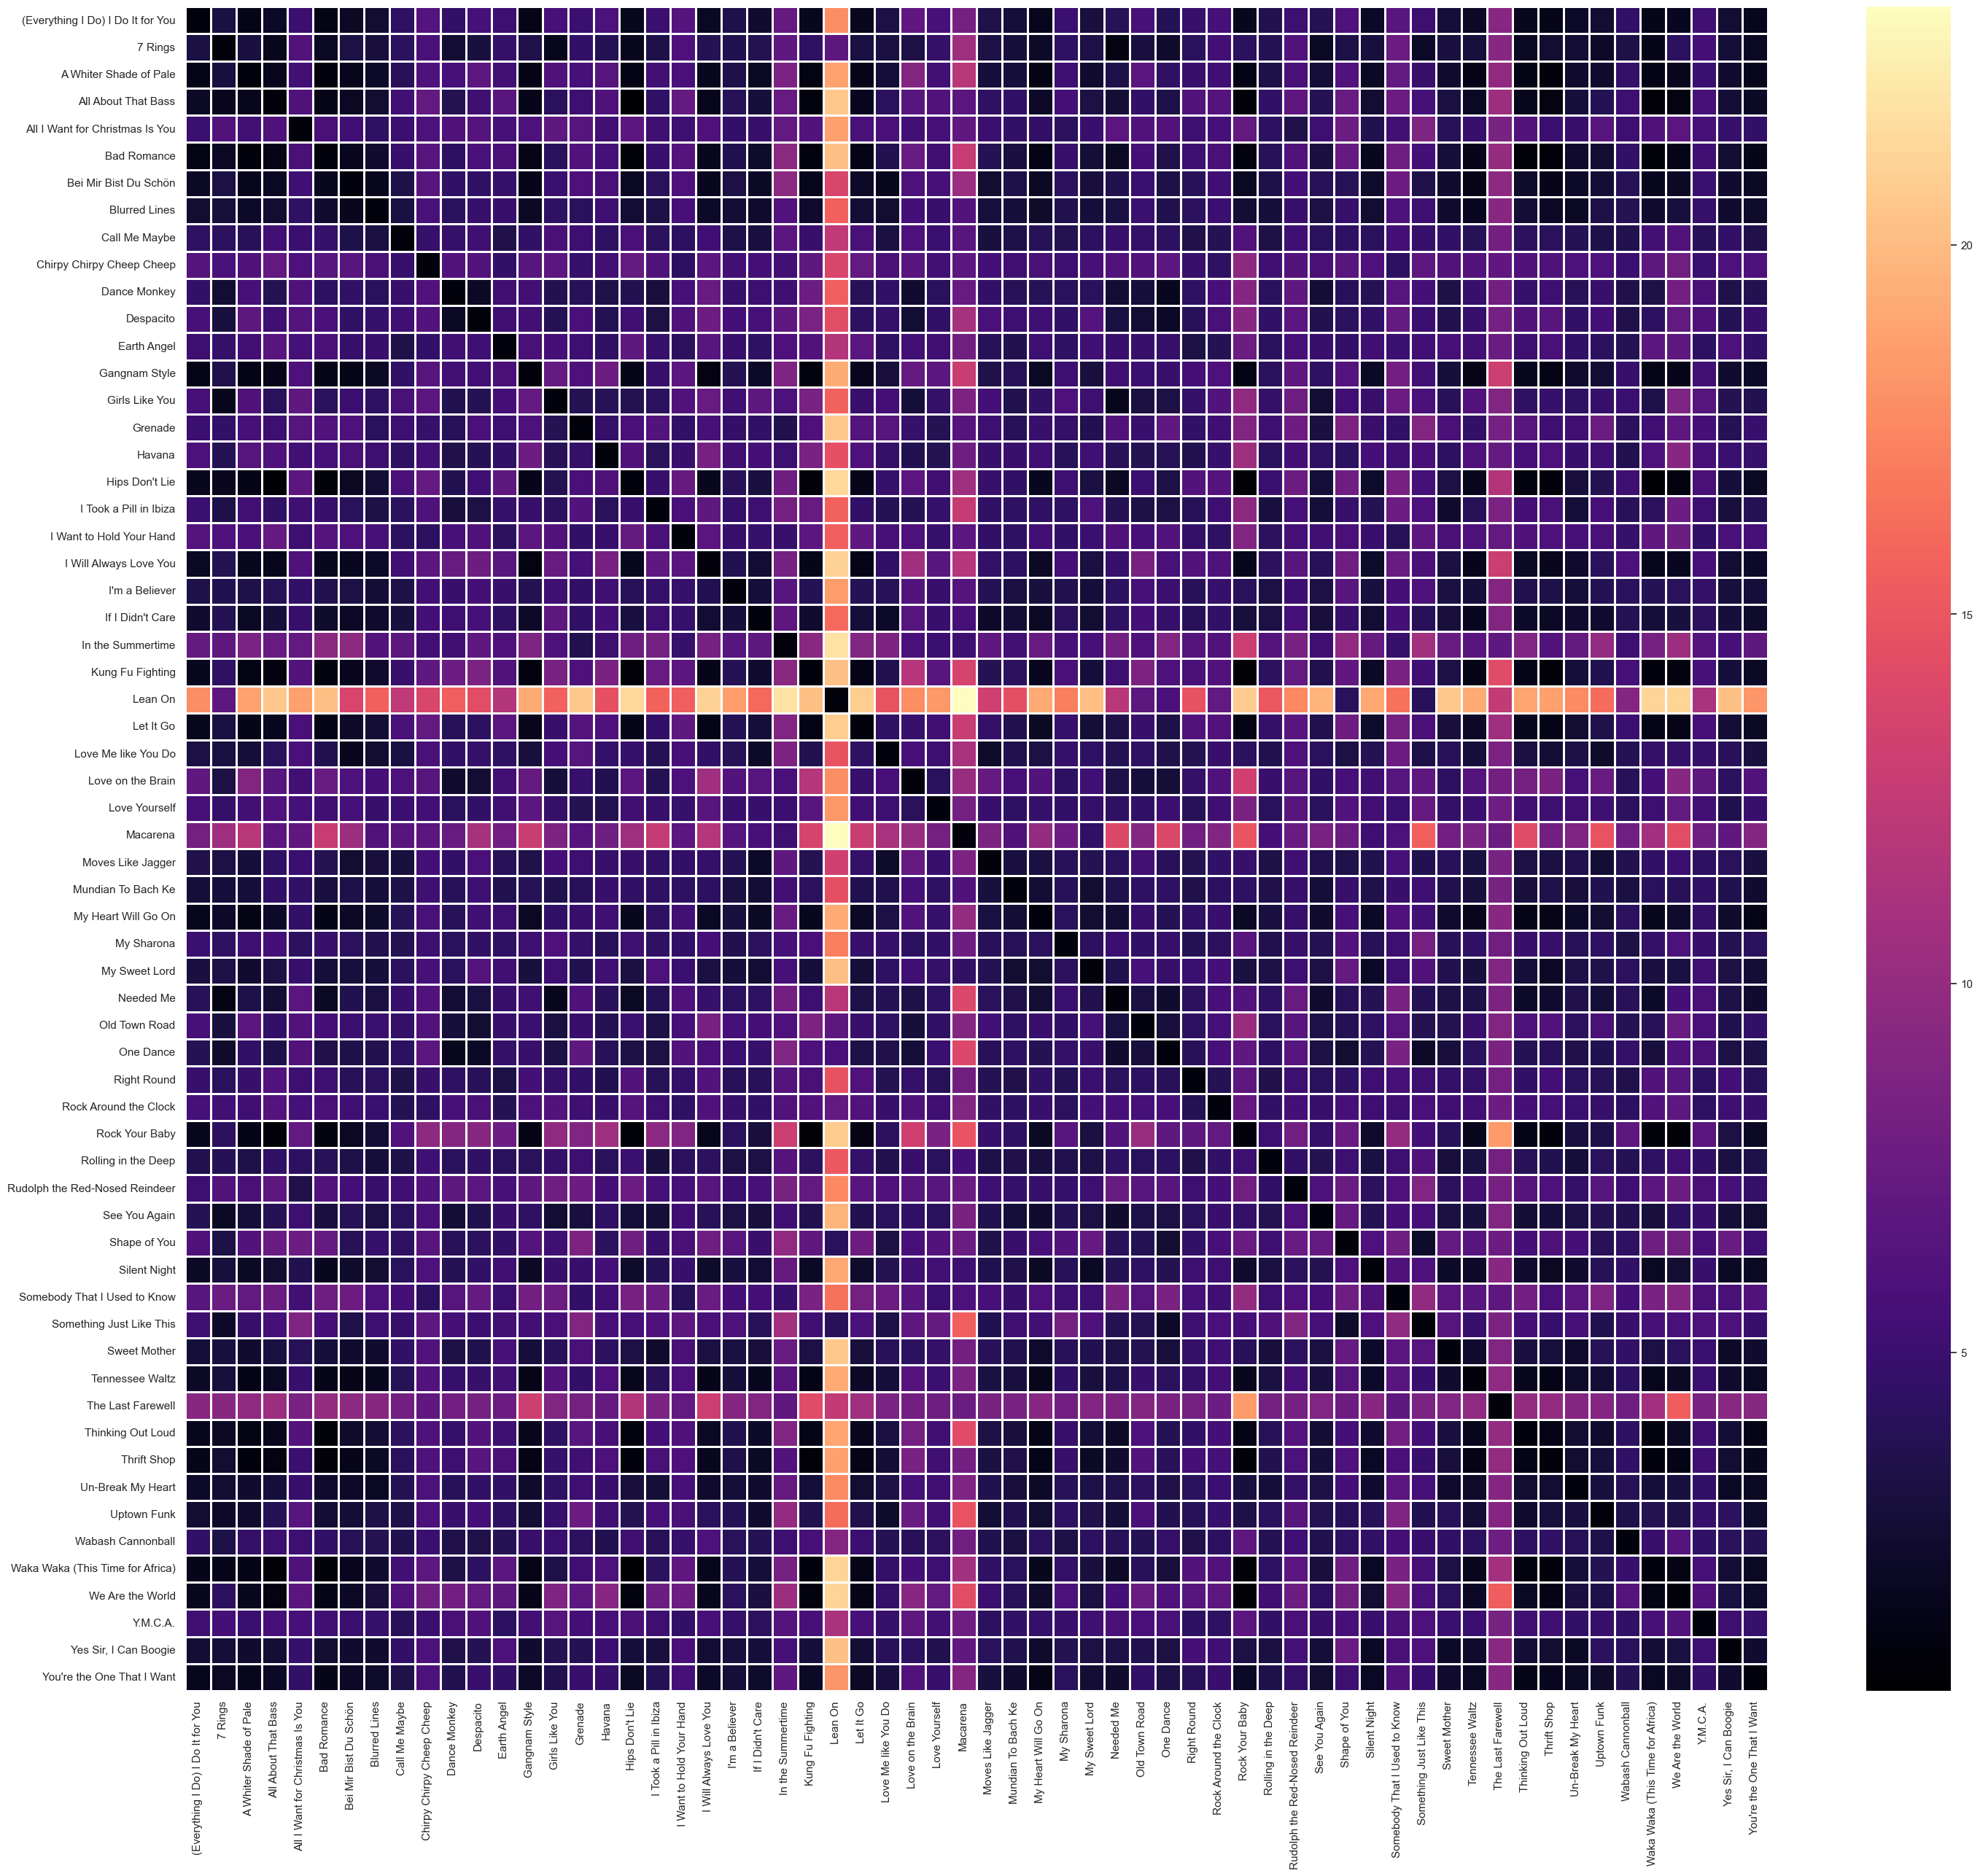

In [25]:
sns.set(rc={'figure.figsize':(35,30)})
sns.heatmap(df, linewidths=2, cmap="magma")

# NLP

In [8]:
def get_text(article: str, url="https://en.wikipedia.org/wiki/"):
    soup = BeautifulSoup(requests.get(url + article).text, "html")
    tags = soup.find_all("p")
    text = ""
    for i in tags:
        text += i.text
    return text

In [9]:
nlp = spacy.load("en_core_web_lg")

doc = nlp(get_text("Minecraft").replace("\n", ""))
doc2 = nlp(get_text("Overwatch").replace("\n", ""))

doc_sents = [sent for sent in doc.sents]
doc_sents2 = [sent for sent in doc2.sents]

doc = nlp(f"{doc_sents[0]} {doc_sents[1]} {doc_sents[2]}")
doc2 = nlp(f"{doc_sents2[0]} {doc_sents2[1]} {doc_sents2[2]}")

doc.similarity(doc2)

0.8849951751595165

## Similarity

In [70]:
df = pd.DataFrame({"Article_1": [], "Article_2": [], "Similarity": []})

for count, docs in enumerate(itertools.combinations(get_fileNames("Music"), 2)):
    doc1 = nlp(get_text(docs[0]).replace("\n", ""))
    doc2 = nlp(get_text(docs[1]).replace("\n", ""))

    doc1 = [sent for sent in doc1.sents]
    doc2 = [sent for sent in doc2.sents]

    doc1 = nlp(f"{doc1[0]} {doc1[1]} {doc1[2]}")
    doc2 = nlp(f"{doc2[0]} {doc2[1]} {doc2[2]}")

    df.loc[count] = [docs[0], docs[1], doc1.similarity(doc2)]

    if count % 100 == 0:
        print(count)

df

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800


,Article_1,Article_2,Similarity
0,(Everything I Do) I Do It for You,7 Rings,0.949525
1,(Everything I Do) I Do It for You,A Whiter Shade of Pale,0.883060
2,(Everything I Do) I Do It for You,All About That Bass,0.921784
3,(Everything I Do) I Do It for You,All I Want for Christmas Is You,0.938959
4,(Everything I Do) I Do It for You,Bad Romance,0.944232
...,...,...,...
1886,We Are the World,"Yes Sir, I Can Boogie",0.945788
1887,We Are the World,You're the One That I Want,0.956024
1888,Y.M.C.A.,"Yes Sir, I Can Boogie",0.931418
1889,Y.M.C.A.,You're the One That I Want,0.938662


<AxesSubplot: >

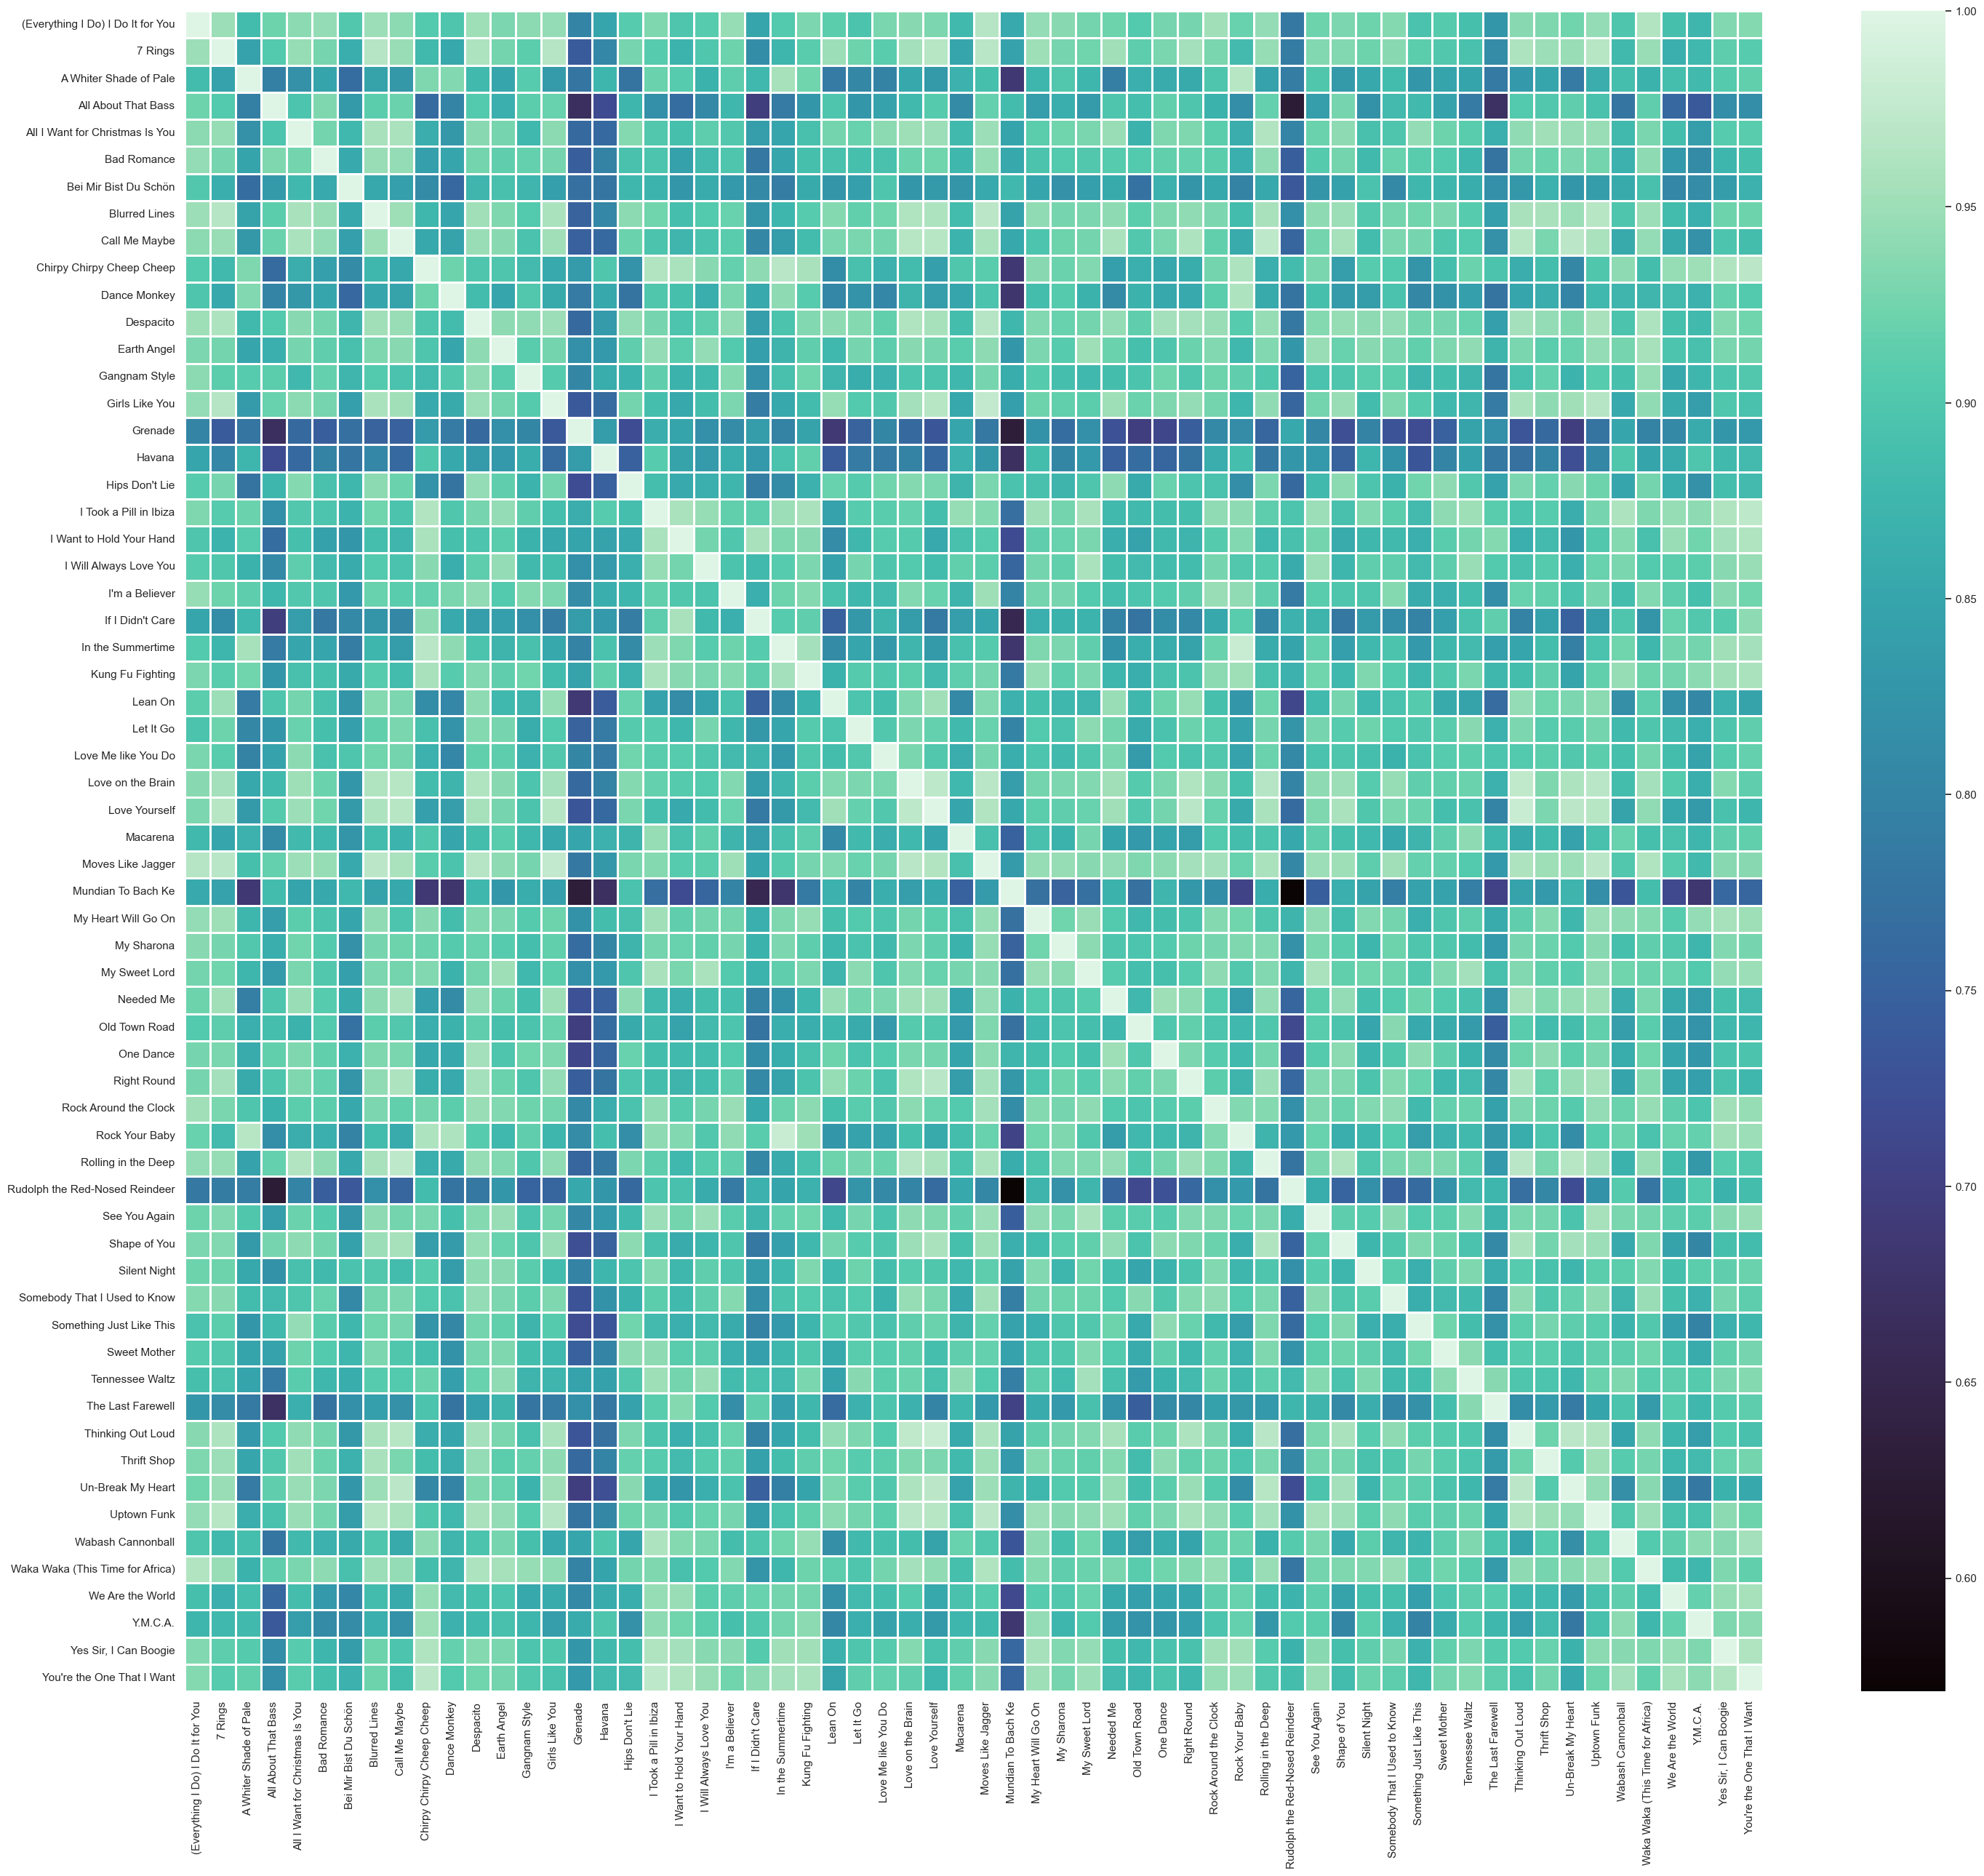

In [78]:
df = pd.read_csv("similarity_music_clean.csv")
df = df.drop(["Unnamed: 0"], axis=1)
df.index = get_fileNames("Music")

sns.heatmap(df, linewidths=2, cmap="mako")

## Classification